## Введение в функциональное программирование

[*Википедия*](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5):

**Функциона́льное программи́рование** — раздел дискретной математики и парадигма программирования, в которой процесс вычисления трактуется как вычисление значений функций в математическом понимании последних (в отличие от функций как подпрограмм в процедурном программировании).

=====================================================


Функциональный код отличается одним свойством: отсутствием побочных эффектов. Он не полагается на данные вне текущей функции, и не меняет данные, находящиеся вне функции. Все остальные «свойства» можно вывести из этого. 

"Нефункциональная" функция:

In [1]:
a = 0
def increment1():
    global a
    a += 1
    print(a)

In [7]:
increment1()

6


"Функциональная" функция:

In [8]:
def increment2(a):
    return a + 1

In [15]:
increment2(12)

13

In [37]:
lst = (i for i in range(20))

In [19]:
type(lst)

generator

In [36]:
for i in lst:
    print(i)
    if i > 12:
        break

In [38]:
class Counter:
    def __init__(self, low, high):
        self.current = low
        self.high = high

    def __iter__(self):
#         return Counter(self.current, self.high)
        return self
    
    def __next__(self):
        # Второй магический метод
        if self.current > self.high:
            raise StopIteration
        else:
            self.current += 1
        return self.current - 1

    def __len__(self):
        return 43
    
for c in Counter(3, 8):
    print(c)

3
4
5
6
7
8


In [44]:
it = iter(Counter(3, 5))
next(it)

3

In [47]:
next(it)

StopIteration: 

## Map

Принимает функцию и набор данных. Создаёт новую коллекцию, выполняет функцию на каждой позиции данных и добавляет возвращаемое значение в новую коллекцию. Возвращает новую коллекцию.

`map(function, iterable)`

Простой map, принимающий список имён и возвращающий список длин:

In [49]:
name_lengths = map(len, ['Маша', 'Петя', 'Оля'])

for nl in name_lengths:
    print(nl)

4
4
3


Допустим у нас есть список с такими элементами:

`[1, 2, 3, 4, 5]`

И мы хотим возвести в квадрат каждый элемент, это можно сделать так:

In [51]:
x = [1, 2, 3, 4, 5]

def square(num):
    return num*num


for nl in map(square, x):
    print(nl)

1
4
9
16
25


In [52]:
list( map(square, x) )  

[1, 4, 9, 16, 25]

### Lambda выражения

Lambda выражения это функции в одну строчку, например, вот lambda выражение, которое возводит в квадрат полученное число:

In [53]:
square = lambda x: x*x

square(3)

9

Этот map возводит в квадрат каждый элемент:

In [54]:
squares = map(lambda x: x*x,  [0, 1, 2, 3, 4])

list(squares)

[0, 1, 4, 9, 16]

Он не принимает именованную функцию, а берёт анонимную, определённую через lambda. Параметры lambda определены слева от двоеточия. Тело функции – справа. Результат возвращается неявным образом.

Нефункциональный код в следующем примере принимает список имён и заменяет их случайными прозвищами.

In [68]:
import random

names = ['Маша', 'Петя', 'Вася']
code_names = ['Шпунтик', 'Винтик', 'Фунтик']

for i in range(len(names)):
    names[i] = random.choice(code_names)

print(names)

['Фунтик', 'Винтик', 'Фунтик']


Перепишем это через map:

In [69]:
import random

names = ['Маша', 'Петя', 'Вася']

secret_names = map(lambda x: random.choice(['Шпунтик', 'Винтик', 'Фунтик']), names)
print(list(secret_names))

['Шпунтик', 'Винтик', 'Винтик']


## Reduce

Reduce принимает функцию и набор пунктов. Возвращает значение, получаемое комбинированием всех пунктов.

Пример простого reduce. Возвращает сумму всех пунктов в наборе:

In [72]:
from functools import reduce

def foo(a, x):
#     print(a, x)
    return a + 2*x

summ = reduce(foo, [0, 1, 2, 3, 4], 10)

print(summ)

30


x – текущий пункт, а – аккумулятор. Это значение, которое возвращает выполнение lambda на предыдущем пункте. reduce() перебирает все значения, и запускает для каждого lambda на текущих значениях а и х, и возвращает результат в а для следующей итерации.

А чему равно а в первой итерации? Оно равно первому элементу коллекции, и reduce() начинает работать со второго элемента. То есть, первый х будет равен второму предмету набора.

Следующий пример считает, как часто слово «капитан» встречается в списке строк:

In [73]:
sentences = ['капитан джек воробей',
             'капитан дальнего плавания',
             'ваша лодка готова, капитан']

cap_count = 0
for sentence in sentences:
    cap_count += sentence.count('капитан')

print(cap_count)

3


Тот же код с использованием reduce:

In [74]:
sentences = ['капитан джек воробей',
             'капитан дальнего плавания',
             'ваша лодка готова, капитан']

cap_count = reduce(lambda a, x: a + x.count('капитан'),
                   sentences,
                   0)
print(cap_count)

3


А откуда здесь берётся начальное значение а? Оно не может быть вычислено из количества повторений в первой строке. Поэтому оно задаётся как третий аргумент функции reduce().

## Filter

Filter принимает функцию и коллекцию. Возвращает коллекцию тех вещей, для которых функция возвращает True

In [75]:
more33 = filter(lambda x: x > 33, [0,1,111,33,44,55])
print(list(more33))

[111, 44, 55]


In [76]:
people = [
    {'имя': 'Маша', 'рост': 160},
    {' рост ': 'Саша', 'рост': 80},
    {'name': 'Паша'}]

heights = map(lambda x: x['рост'], 
              filter(lambda x: 'рост' in x, 
                     people))

heights = list(heights)

if heights:
    from operator import add
    average_height = reduce(add, heights) / len(heights)
average_height

120.0

In [ ]:
if []:
    print('True')

## Есть и альтернативы

Помимо стандартных функция `map/filter...` и стандартного пакета `functools`

Есть и сторонние пакеты, упрощающие написание функционального кода

Например `PyFunctional`

```bash
# Установить пакет
```
```bash
$ pip install pyfunctional
```

In [77]:
import functional

functional.__version__

'1.4.1'

In [81]:
from functional import seq

seq([1, 2, 3, 4]).map(lambda x: x * 2).filter(lambda x: x > 4).reduce(lambda x, y: x + y)

14

In [84]:
seq(1, 2, 3, 4) \
    .map(lambda x: x * 2) \
    .filter(lambda x: x > 4) \
    .reduce(lambda x, y: x + y) 

14

In [86]:
from functional import seq
from collections import namedtuple

Transaction = namedtuple('Transaction', 'reason amount')
transactions = [
    Transaction('github', 7),
    Transaction('food', 10),
    Transaction('coffee', 5),
    Transaction('digitalocean', 5),
    Transaction('food', 5),
    Transaction('riotgames', 25),
    Transaction('food', 10),
    Transaction('amazon', 200),
    Transaction('paycheck', -1000)
]

food_cost = seq(transactions)\
    .filter(lambda x: x.reason == 'food')\
    .map(lambda x: x.amount) \
    .sum()

# Using the LINQ inspired APIs
food_cost = seq(transactions)\
    .where(lambda x: x.reason == 'food')\
    .select(lambda x: x.amount).sum()


food_cost

25

In [89]:
('123', 1) + ('123', 1)

('123', 1, '123', 1)

In [88]:
words = 'I dont want to believe I want to know'.split(' ')
seq(words).map(lambda word: (word, 1)).reduce_by_key(lambda x, y: x + y).to_list()

[('I', 2), ('dont', 1), ('want', 2), ('to', 2), ('believe', 1), ('know', 1)]

| Function | Description | Type |
| :------- | :-----------: | :--- |
|`map(func)/select(func)` | Maps `func` onto elements of sequence | transformation|
|`starmap(func)/smap(func)` | Apply `func` to sequence with `itertools.starmap` | transformation|
|`filter(func)/where(func)` | Filters elements of sequence to only those where `func(element)` is `True` | transformation|
|`filter_not(func)` | Filters elements of sequence to only those where `func(element)` is `False` | transformation|
|`flatten()` | Flattens sequence of lists to a single sequence | transformation|
|`flat_map(func)` | `func` must return an iterable. Maps `func` to each element, then merges the result to one flat sequence | transformation|
|`group_by(func)` | Groups sequence into `(key, value)` pairs where `key=func(element)` and `value` is from the original sequence | transformation|
|`group_by_key()` | Groups sequence of `(key, value)` pairs by `key` | transformation|
|`reduce_by_key(func)` | Reduces list of `(key, value)` pairs using `func` | transformation|
|`count_by_key()` | Counts occurrences of each `key` in list of `(key, value)` pairs | transformation|
|`count_by_value()` | Counts occurrence of each value in a list | transformation|
|`union(other)` | Union of unique elements in sequence and `other` | transformation|
|`intersection(other)` | Intersection of unique elements in sequence and `other` | transformation|
|`difference(other)` | New sequence with unique elements present in sequence but not in `other` | transformation|
|`symmetric_difference(other)` | New sequence with unique elements present in sequence or `other`, but not both | transformation|
|`distinct()` | Returns distinct elements of sequence. Elements must be hashable | transformation|
|`distinct_by(func)` | Returns distinct elements of sequence using `func` as a key | transformation|
|`drop(n)` | Drop the first `n` elements of the sequence | transformation|
|`drop_right(n)` | Drop the last `n` elements of the sequence | transformation|
|`drop_while(func)` | Drop elements while `func` evaluates to `True`, then returns the rest | transformation|
|`take(n)` | Returns sequence of first `n` elements | transformation|
|`take_while(func)` | Take elements while `func` evaluates to `True`, then drops the rest | transformation|
|`init()` | Returns sequence without the last element | transformation|
|`tail()` | Returns sequence without the first element | transformation|
|`inits()` | Returns consecutive inits of sequence | transformation|
|`tails()` | Returns consecutive tails of sequence | transformation|
|`zip(other)` | Zips the sequence with `other` | transformation|
|`zip_with_index(start=0)` | Zips the sequence with the index starting at `start` on the right side | transformation|
|`enumerate(start=0)` | Zips the sequence with the index starting at `start` on the left side | transformation|
|`cartesian(*iterables, repeat=1)` | Returns cartesian product from itertools.product | transformation|
|`inner_join(other)` | Returns inner join of sequence with other. Must be a sequence of `(key, value)` pairs | transformation|
|`outer_join(other)` | Returns outer join of sequence with other. Must be a sequence of `(key, value)` pairs | transformation|
|`left_join(other)` | Returns left join of sequence with other. Must be a sequence of `(key, value)` pairs | transformation|
|`right_join(other)` | Returns right join of sequence with other. Must be a sequence of `(key, value)` pairs | transformation|
|`join(other, join_type='inner')` | Returns join of sequence with other as specified by `join_type`. Must be a sequence of `(key, value)` pairs | transformation|
|`partition(func)` | Partitions the sequence into elements which satisfy `func(element)` and those that don't | transformation|
|`grouped(size)` | Partitions the elements into groups of size `size` | transformation|
|`sorted(key=None, reverse=False)/order_by(func)` | Returns elements sorted according to python `sorted` | transformation|
|`reverse()` | Returns the reversed sequence | transformation|
|`slice(start, until)` | Sequence starting at `start` and including elements up to `until` | transformation|
|`head()` / `first()` | Returns first element in sequence | action|
|`head_option()` | Returns first element in sequence or `None` if its empty | action|
|`last()` | Returns last element in sequence | action|
|`last_option()` | Returns last element in sequence or `None` if its empty | action|
|`len()` / `size()` | Returns length of sequence | action|
|`count(func)` | Returns count of elements in sequence where `func(element)` is True | action|
|`empty()` | Returns `True` if the sequence has zero length | action|
|`non_empty()` | Returns `True` if sequence has non-zero length | action|
|`all()` | Returns `True` if all elements in sequence are truthy | action|
|`exists(func)` | Returns `True` if `func(element)` for any element in the sequence is `True` | action|
|`for_all(func)` | Returns `True` if `func(element)` is `True` for all elements in the sequence | action|
|`find(func)` | Returns the element that first evaluates `func(element)` to `True` | action|
|`any()` | Returns `True` if any element in sequence is truthy | action|
|`max()` | Returns maximal element in sequence | action|
|`min()` | Returns minimal element in sequence | action|
|`max_by(func)` | Returns element with maximal value `func(element)` | action|
|`min_by(func)` | Returns element with minimal value `func(element)` | action|
|`sum()/sum(projection)` | Returns the sum of elements possibly using a projection | action|
|`product()/product(projection)` | Returns the product of elements possibly using a projection | action|
|`average()/average(projection)` | Returns the average of elements possibly using a projection | action|
|`aggregate(func)/aggregate(seed, func)/aggregate(seed, func, result_map)` | Aggregate using `func` starting with `seed` or first element of list then apply `result_map` to the result | action|
|`fold_left(zero_value, func)` | Reduces element from left to right using `func` and initial value `zero_value` | action|
|`fold_right(zero_value, func)` | Reduces element from right to left using `func` and initial value `zero_value` | action|
|`make_string(separator)` | Returns string with `separator` between each `str(element)` | action|
|`dict(default=None)` / `to_dict(default=None)` | Converts a sequence of `(Key, Value)` pairs to a `dictionary`. If |`default` is not None, it must be a value or zero argument callable which will be used to create a `collections.defaultdict` | action|
|`list()` / `to_list()` | Converts sequence to a list | action|
|`set() / to_set()` | Converts sequence to a set | action|
|`to_file(path)` | Saves the sequence to a file at path with each element on a newline | action|
|`to_csv(path)` | Saves the sequence to a csv file at path with each element representing a row | action|
|`to_jsonl(path)` | Saves the sequence to a jsonl file with each element being transformed to json and printed to a new line | action|
|`to_json(path)` | Saves the sequence to a json file. The contents depend on if the json root is an array or dictionary | action|
|`to_sqlite3(conn, tablename_or_query, *args, **kwargs)` | Save the sequence to a SQLite3 db. The target table must be created in advance. | action|
|`to_pandas(columns=None)` | Converts the sequence to a pandas DataFrame | action|
|`cache()` | Forces evaluation of sequence immediately and caches the result | action|
|`for_each(func)` | Executes `func` on each element of the sequence | action|

## А вообще....

Отличное видео про функциональный подход в програмировании (**ОСТОРОЖНО АНГЛИЙСКИЙ!**):

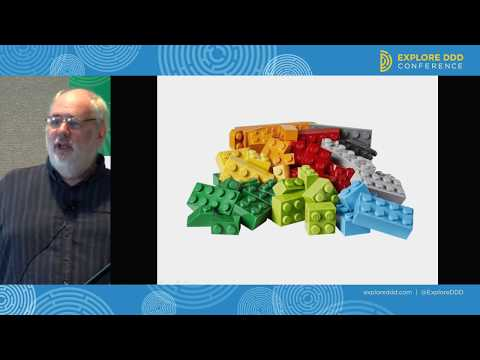

In [90]:
from IPython.display import YouTubeVideo

video1 = 'PLFl95c-IiU'
# video1 = 'dQw4w9WgXcQ'

YouTubeVideo(video1, width=800, height=600)